# Engenharia de Software para Ciência de Dados - PUC-Rio

### Problemas de Regressão
Marcos Kalinowski e Tatiana Escovedo

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Bibliotecas dos algoritmos de regressão
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Bibliotecas das métricas de regressão
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Importação dos dados

http://lib.stat.cmu.edu/datasets/boston

Para este projeto, investigaremos o dataset Boston House Price, um dataset para problemas de regressão em que todos os atributos são numéricos.

Cada registro no banco de dados descreve um subúrbio ou cidade de Boston. Os dados foram retirados da Área Estatística Metropolitana Padrão de Boston (SMSA) em 1970. Os atributos são definidos da seguinte forma (retirado do UCI Machine Learning Repository):

1. CRIM: Taxa de criminalidade per capita por cidade
2. ZN: Proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados
3. INDUS: Proporção de acres não comerciais por cidade
4. CHAS: Variável fictícia CHAS Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
5. NOX: Concentração de óxidos nítricos (partes por 10 milhões)
6. RM: número médio de quartos por habitação
7. AGE: proporção de unidades ocupadas construídas antes de 1940
8. DIS: Distâncias ponderadas para cinco centros de emprego em Boston
9. RAD: Índice de acessibilidade às rodovias radiais
10. TAX: Taxa de imposto sobre o valor total da propriedade por 10 mil dólares
11. PTRATIO: Proporção de alunos por professor por cidade
12. B: 1000(Bk - 0.63)^2 onde Bk é a proporção de negros por cidade
13. LSTAT: % do menor status da população
14. MEDV: Valor médio das casas ocupadas pelos proprietários em mil dólares

Podemos ver que os atributos de entrada têm uma mistura de unidades.

In [ ]:
# Datasets do scikit-learn: https://scikit-learn.org/stable/datasets/toy_dataset.html

# Carrega o dataset boston
boston = datasets.load_boston()

# Extraindo X, Y e os nomes das colunas dos atributos
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]

# Se precisar converter para dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Preparação dos dados

In [ ]:
# definindo o tamanho do conjunto de teste
test_size = 0.20 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# definindo a métrica de avaliação dos algoritmos
scoring = 'neg_mean_squared_error' # MSE
# scoring = 'r2' # R2

# particionando em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# configurando a validação cruzada
n_splits=10
kfold = KFold(n_splits=n_splits)


## Modelos de Regressão

Para avaliar cada algoritmo, iremos usar diversas métricas, dentre elas, a medida de erro quadrático médio (MSE). Na implementação do scikit-learn, os valores médios dos erros quadráticos estão invertidos (negativos), devido a uma peculiaridade da função usada (para mais detalhes, consulte a documentação).

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

### Regressão Linear

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
model = LinearRegression()
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(abs(results.mean()))

21.37985572667861


### K-Nearest Neighbors

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
model = KNeighborsRegressor(metric='euclidean')
print (model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(abs(results.mean()))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
41.89648839024391


### Árvores de Decisão

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
model = DecisionTreeRegressor(random_state=seed)
print (model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(abs(results.mean()))

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 7, 'splitter': 'best'}
23.21126036585366


### Support Vector Machines

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
model = SVR()
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(abs(results.mean()))

67.8278859731828


## Comparação de Modelos

LR: MSE 21.38 (9.41) - RMSE 4.62
KNN: MSE 41.90 (13.90) - RMSE 6.47
CART: MSE 23.21 (10.04) - RMSE 4.82
SVM: MSE 67.83 (29.05) - RMSE 8.24


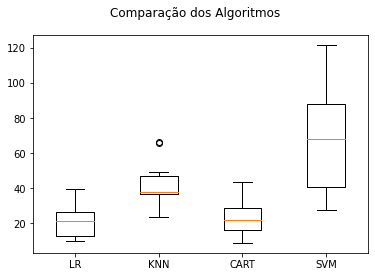

In [ ]:
# Lista de modelos a avaliar
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('SVM', SVR()))

# Treinamento e avaliação de cada modelo
results = []
names = [] 
kfold = KFold(n_splits=10) 

for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(abs(cv_results))
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Comparação dos algoritmos em boxplot
fig = plt.figure()
fig.suptitle('Comparação dos Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Vamos agora verificar se a padronização de dados tem algum efeito nos resultados dos modelos.

ScaledLR: MSE 21.38 (9.41) - RMSE 4.62
ScaledKNN: MSE 20.11 (12.38) - RMSE 4.48
ScaledCART: MSE 23.25 (10.02) - RMSE 4.82
ScaledSVM: MSE 29.63 (17.01) - RMSE 5.44


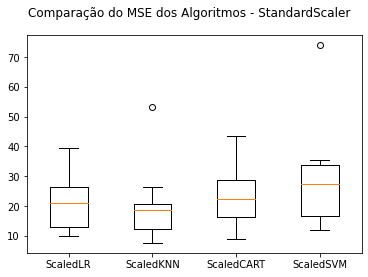

In [ ]:
# Pipelines para padronização do dataset e aplicação do modelo
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(random_state=seed))])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
results = []
names = []

# Aplicação dos pipelines
for name, model in pipelines:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(abs(cv_results))
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Algoritmos - StandardScaler') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

## Tuning Automático de Hiperparâmetros



In [ ]:
# padronização dos dados - OBS: Não estou preocupada neste exemplo com Data Leakage!
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

In [ ]:
# ----- KNN
k = [1,3,5,7,9,11,13,15,17,19,21] # número de vizinhos
distancias = ["euclidean", "manhattan", "minkowski"] # distância
param_grid = dict(n_neighbors=k, metric=distancias)
model = KNeighborsRegressor()

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# imprime o melhor resultado
print("Melhor KNN: %f usando %s" % (abs(grid_result.best_score_), grid_result.best_params_)) 

# ----- CART
criterios = ['mse', 'mae'] # função para medir a qualidade de uma divisão
max_depth = [3,5,10,20,30,40,50] # profundidade máxima
min_samples_leaf = [3,5,10,20,30,40,50] # número mínimo de instâncias em cada folha
param_grid = dict(criterion=criterios, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
model = DecisionTreeRegressor(random_state=seed)

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# imprime o melhor resultado
print("Melhor CART: %f usando %s" % (abs(grid_result.best_score_), grid_result.best_params_)) 

# ----- SVM
c_values = [0.1, 0.5, 1.0, 1.5, 2.0] # rigidez da margem
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid'] # função kernel
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVR()

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# imprime o melhor resultado
print("Melhor SVM: %f usando %s" % (abs(grid_result.best_score_), grid_result.best_params_)) 

Melhor KNN: 15.041320 usando {'metric': 'manhattan', 'n_neighbors': 3}
Melhor CART: 17.650667 usando {'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 20}
Melhor SVM: 22.531401 usando {'C': 1.0, 'kernel': 'linear'}


## Modelo Final

In [ ]:
# padronização os dados de treino
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# criando e treinando um modelo com a melhor configuração até o momento
model = KNeighborsRegressor(metric='manhattan', n_neighbors=3)

model.fit(rescaledX, Y_train)

# padronização dos dados de teste
rescaledTestX = scaler.transform(X_test)

# predições
predictions = model.predict(rescaledTestX)

# estimando o MSE e R2 no conjunto de teste
print(mean_squared_error(Y_test, predictions))
print(r2_score(Y_test, predictions))

24.16641612200437
0.7009338621239385


In [ ]:
Y_test

array([21.7, 18.5, 22.2, 20.4,  8.8,  8.3, 21.4, 23.6, 23.5, 19. , 10.2,
       31.6, 18.4, 19.4, 44. , 23.2, 22. , 33.1, 13.2, 21.7, 16.7, 23.9,
       42.3, 18.5, 14.6,  7.5, 33.4, 22. , 28.1, 24.8, 19.9, 24.8, 28.7,
       14.1, 43.5, 20.4, 18.3, 13.4, 21. , 22. , 22.6, 13.9, 13.3, 26.5,
       20. ,  9.5, 21.6, 22.6, 15.6, 23.1, 27.1, 25.2, 15. , 21.9,  9.6,
       22.7, 18.3, 21.4, 20.5, 21.1, 24.5, 31. , 18.7, 18.7, 22.7, 50. ,
       16.7, 23. , 20.4, 22.8, 24.8, 10.5, 18.2, 31.5, 23.8, 19.6, 12.7,
       15.2, 31.2, 14.5, 17.8, 25. , 23. , 50. , 23.7, 25.1, 24.7, 16.8,
       34.7, 23.3, 50. , 46.7, 43.1, 24.4, 24.1,  6.3, 26.4, 16.3, 17.2,
       28. , 15.2, 16.6])

In [ ]:
predictions

array([20.48966241, 18.87735144, 20.24394024, 18.84945651,  2.19745556,
        9.69821292, 18.43639615, 26.46058331, 28.2149766 , 12.44930065,
        5.52729868, 30.52225319, 17.42054949, 19.59480248, 36.22683878,
       20.75553754, 27.98330262, 32.10753981, 12.51558801, 23.23027546,
       19.54425316, 26.75779956, 37.37874758, 13.93903399, 10.7299782 ,
       14.98696066, 33.87999429, 25.28094668, 25.24151363, 26.96255868,
       17.73614714, 29.57787452, 30.2690915 , 15.67394432, 37.78338198,
       19.42752395, 18.56498411, 16.25858022, 21.45916267, 27.66049962,
       25.81587558, 18.1686599 , 14.95765179, 25.14085023, 16.94416426,
       13.31323013, 23.4009021 , 17.75342149, 19.69476052,  1.81703342,
       26.31943094, 26.45112287,  7.51888039, 37.40557689, 13.70183776,
       19.22563244, 19.21530747, 18.77979431, 22.50530322, 21.68326608,
       20.95018429, 33.80178112, 16.94834644, 20.46919399, 21.74975587,
       42.21104215, 17.68860193, 19.61755394, 21.65563661, 26.32